# Create an ESN for sepsis shared features

## Load ICU sepsis data log

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import math as m
%matplotlib inline

In [2]:
path = '../training/'

In [3]:
# Choose patient sample
sample_num = 785

In [4]:
# Import and print dataframe layout
def loadICUdata(sample_num, path = './', printdf = False):
    samplestr = 'p' + (str(sample_num) + '.psv').rjust(9, '0')
    fname = path + samplestr
    df = pd.read_csv(fname, sep = '|')
    #print(fname, ' file:')
    if printdf:
        print(df)
    return df

In [5]:
df = loadICUdata(sample_num, path, False)

In [6]:
#df

## Check sepsis labels for ALL patients

In [7]:
# get the sepsis label value
def get_sepsislabel(df):
    sl = df[["SepsisLabel"]]
    count = df['SepsisLabel'].value_counts()
    count_healthy = -1
    count_sep = -1
    
    if len(count) == 2:
        count_sep = count[1]
        count_healthy = count[0]
        
    elif len(count) == 1:
        if sl.values[0] == 0:
            count_healthy = count.values[0]
        elif sl.values[0] == 1:
            count_sep = count.values[0]
    return sl, count_healthy, count_sep


In [8]:
count = df['SepsisLabel'].value_counts()
count.values
len(count)
sl, ch, cs = get_sepsislabel(df)
len(sl)

260

In [9]:
# Print result
sl, ch, cs = get_sepsislabel(df) 
print('patient {:d}, {:d} {:d} {:2.2f}%'.format(sample_num, ch, cs, 100*cs/len(sl)))

patient 785, 260 -1 -0.38%


## Loop study

In [10]:
# Run in a loop and get a sepsis presence report
SL = []    #Sepsis labels
CH = []    #Healthy hours count
CS = []    #Sepsis hours count
CSCH = []  #Percentage cs/(cs+ch)
DATA = []  #DATA structure
for i in range(1,5001):
    df = loadICUdata(i, path, False)
    DATA.append(df) 
    sl, ch, cs = get_sepsislabel(df) 
    SL.append(sl)
    CH.append(ch)
    CS.append(cs)
    if cs != -1 and ch != -1:
        csch = 1.0*cs/(cs + ch)
    elif cs == -1:
        csch = 0
    elif ch == -1:
        csch = 1
    CSCH.append(csch)
    
CSCH = np.array(CSCH)

In [11]:
# Count sepsis patients
print(CSCH, np.count_nonzero(CSCH))

[ 0.  0.  0. ...,  0.  0.  0.] 279


In [12]:
sepsis_idx = np.where(CSCH!=0)

In [13]:
# Check percentage of sepsis hours for sepsis patients
CSCH[sepsis_idx]

array([ 0.11111111,  0.02214022,  0.27777778,  0.11363636,  1.        ,
        0.09615385,  0.28571429,  0.33333333,  0.25641026,  0.14754098,
        1.        ,  0.2195122 ,  1.        ,  0.07627119,  0.04975124,
        0.15151515,  0.09183673,  0.37037037,  0.20408163,  0.06944444,
        0.04587156,  0.625     ,  0.07894737,  0.09183673,  0.24390244,
        1.        ,  0.03846154,  0.2       ,  0.10465116,  0.76923077,
        0.76923077,  0.27777778,  0.225     ,  0.17857143,  1.        ,
        0.08256881,  0.20408163,  0.16981132,  0.14084507,  0.81818182,
        0.0990099 ,  0.43478261,  0.12820513,  0.09803922,  0.33333333,
        0.13461538,  0.41666667,  1.        ,  0.11627907,  0.08333333,
        0.23255814,  0.66666667,  0.29411765,  1.        ,  0.90909091,
        0.38461538,  0.03125   ,  0.07246377,  0.04291845,  0.20833333,
        1.        ,  0.16393443,  0.90909091,  0.22727273,  1.        ,
        0.33333333,  0.13888889,  0.4       ,  0.35714286,  0.25

## Matrix Sepsis

In [14]:
def get_dfmaxcount(list_of_lists):
    maxval = -1
    maxval_i = -1
    for i in range(len(list_of_lists)):
        val = list_of_lists[i].count(axis = 0)[0]
        if val > maxval:
            maxval = val
            maxval_i = i
    return maxval, maxval_i

In [15]:
# get max val in SepsisLabel count and idx position
mv, mvi = get_dfmaxcount(SL)

In [16]:
mv, mvi

(336, 1921)

In [17]:
# Initialize sepsis matrix
sepsis_matrix = -1 * np.ones((len(SL),mv), dtype=int)
for i in range(len(SL)):
    sepsis_matrix[i][0:(SL[i].count(axis = 0)[0])] = (SL[i].values).flatten()
np.shape(sepsis_matrix)

(5000, 336)

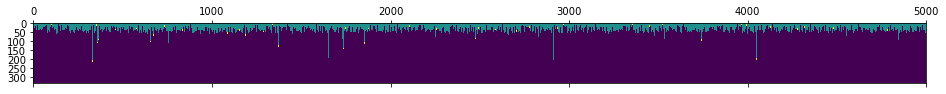

In [18]:
plt.matshow(np.transpose(sepsis_matrix))

## Matrix display 1000 by 1000

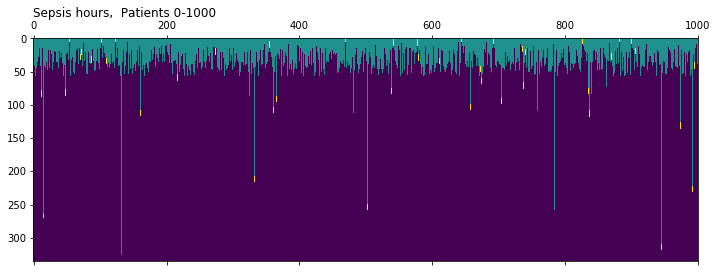

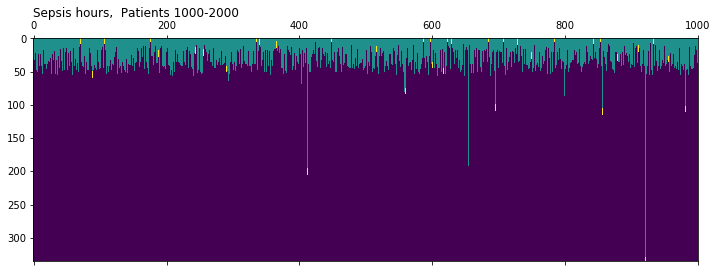

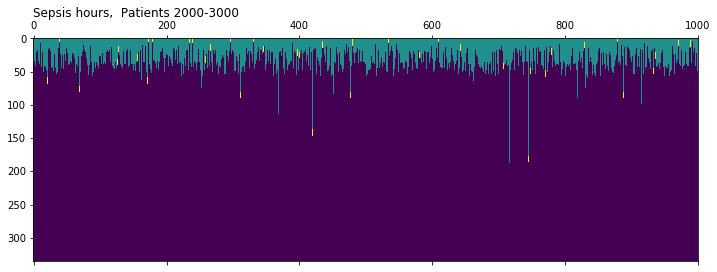

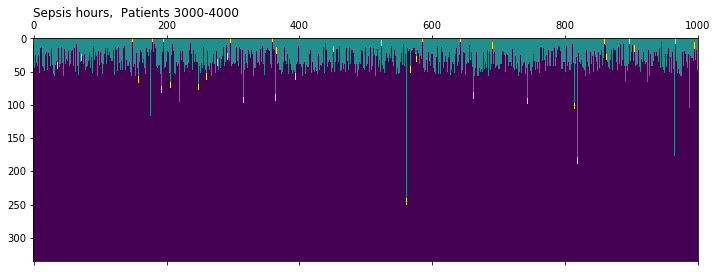

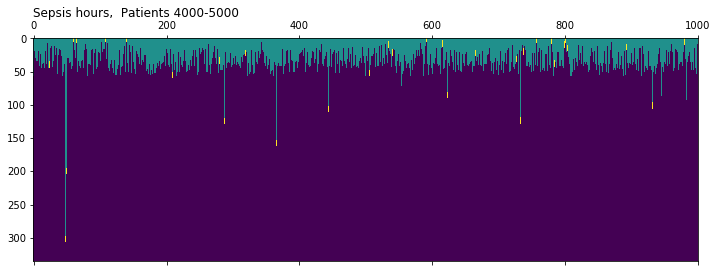

In [19]:
step = 1000
for i in range(int(len(SL)/step)):
    plt.matshow(np.transpose(sepsis_matrix[i*step:(i+1)*step]))
    plt.title("Sepsis hours,  Patients " + str(i*step) + "-" + str(i*step+step)+"\n",loc='left')

## Sepsis patients only

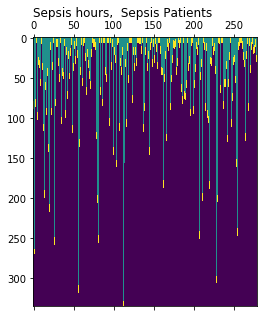

In [20]:
plt.matshow(np.transpose(sepsis_matrix[sepsis_idx]))
plt.title("Sepsis hours,  Sepsis Patients \n",loc='left')

## Matrix Sepsis (from last hours perspective, reversed)

In [21]:
# Initialize sepsis matrix
sepsis_matrix_last = -1 * np.ones((len(SL),mv), dtype=int)
for i in range(len(SL)):
    sepsis_matrix_last[i][-(SL[i].count(axis = 0)[0]):] = (SL[i].values).flatten()
np.shape(sepsis_matrix_last)

(5000, 336)

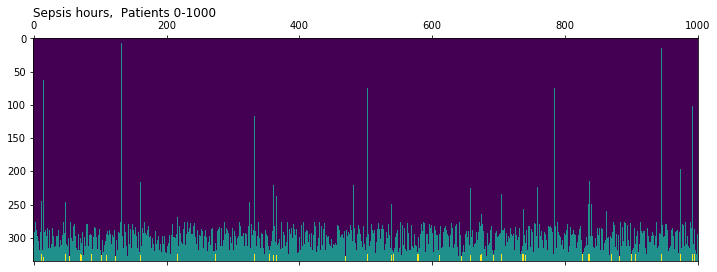

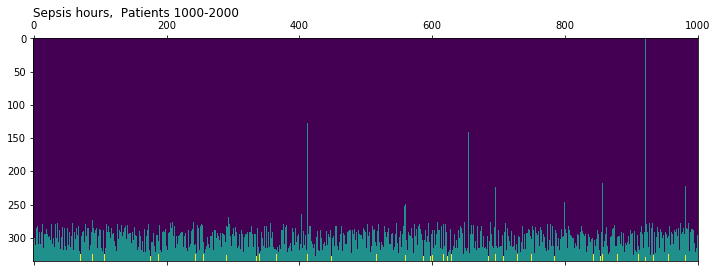

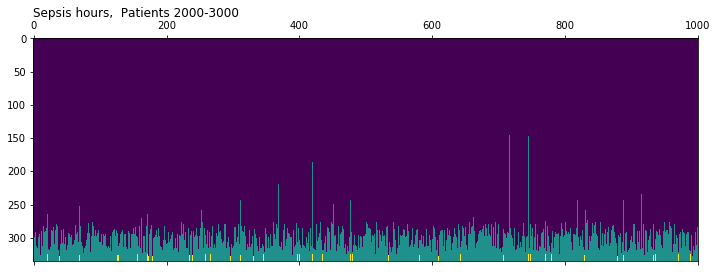

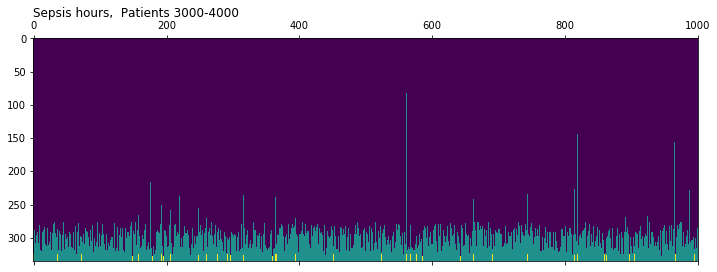

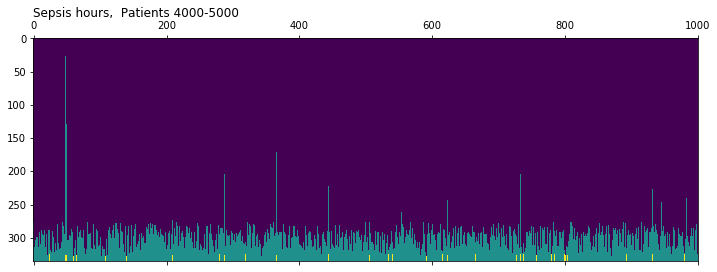

In [22]:
step = 1000
for i in range(int(len(SL)/step)):
    plt.matshow(np.transpose(sepsis_matrix_last[i*step:(i+1)*step]))
    plt.title("Sepsis hours,  Patients " + str(i*step) + "-" + str(i*step+step)+"\n",loc='left')

## Focus on sepsis patients, last nhours

In [23]:
sepsis_matrix_pos = sepsis_matrix_last[sepsis_idx[0]]

In [24]:
nhours = 50

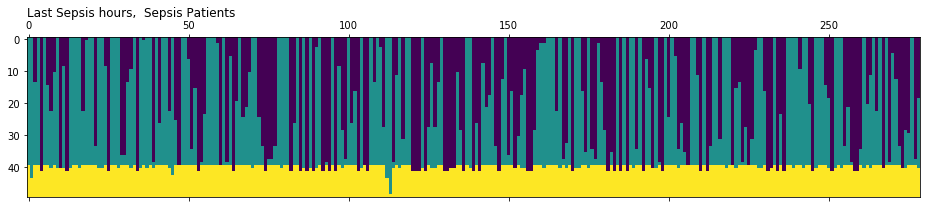

In [25]:
plt.matshow(np.transpose(sepsis_matrix_pos[:,-nhours:]))
plt.title("Last Sepsis hours,  Sepsis Patients \n",loc='left')

## Sepsis keys for the ESN

In [26]:
sepsis_idx = np.where(CSCH!=0)
healthy_idx = np.where(CSCH==0) 

In [27]:
# We use features (9) shared by all sepsis patients
s_keys = {}
s_keys = ['HR', 'O2Sat', 'SBP', 'MAP', 'DBP', 'Age', 'Gender', 'HospAdmTime', 'ICULOS'] #, 'SepsisLabel']
type(s_keys)
len(s_keys)

9

In [28]:
sepsis_idx[0][int(len(sepsis_idx[0])/2)]

2331

In [29]:
healthy_idx[0][int(len(healthy_idx[0])/2)]

2512

In [30]:
DATA[0]["HR"].values

array([   nan,   93. ,   91. ,   93. ,   93. ,    nan,   91.5,   94. ,
         94. ,  102. ,  106. ,  107. ,  102. ,   98. ,   95. ,  105. ,
         94. ,   98. ,   98. ,  105. ,   96. ,  102. ,  105. ,  107. ])

In [31]:
# Feature matrix
feature_matrix = []
patient = []
sepsis_label = []
for i in range(5000):
    initval = 0
    A = initval * np.ones((DATA[i].shape[0],len(s_keys)), dtype=np.double)
    j = 0
    for key in s_keys:
        A[:,j] = DATA[i][key].values
        j = j + 1
       # print (i, key, j)
    A = np.nan_to_num(A)
    sep_lab = (DATA[i]["SepsisLabel"].values).reshape(-1,1)
    if i==0:
        feature_matrix=(A)
        patient = i*np.ones((DATA[i].shape[0],1),dtype=np.int)
        sepsis_label = sep_lab
        
    else: 
        feature_matrix = np.vstack((feature_matrix, A))
        patient = np.vstack((patient, i*np.ones((DATA[i].shape[0],1),dtype=np.int)))
        sepsis_label = np.vstack((sepsis_label, sep_lab))

In [32]:
type(feature_matrix[0])

numpy.ndarray

In [33]:
feature_matrix
np.shape(feature_matrix)

(188453, 9)

In [34]:
# Keep a raw copy
raw_feature_matrix = np.copy(feature_matrix)

In [35]:
patient
np.shape(patient)

(188453, 1)

In [36]:
sepsis_label
np.shape(sepsis_label)

(188453, 1)

In [37]:
# Single entry example
i_e = 90000
print(patient[i_e])
print(feature_matrix[i_e,:])
print(sepsis_label[i_e])


[2378]
[  89.     98.    120.     70.     50.     62.      0.     -1.38   22.  ]
[0]


In [38]:
#offset = 500
#plt.matshow(feature_matrix[offset:offset+100,:])

## Preprocess features (log(-HospAdmTime-1))

In [39]:
feature_matrix= np.copy(raw_feature_matrix)
feat_i = s_keys.index('HospAdmTime')

In [40]:
print(np.min(raw_feature_matrix[:,feat_i]), np.max(raw_feature_matrix[:,feat_i]))
argmin = (np.argmin(raw_feature_matrix[:,feat_i]))
print(argmin, patient[argmin])

# for i in range(len(raw_feature_matrix[:,feat_i])):
#     print(raw_feature_matrix[i,feat_i])

-5366.86 0.0
30281 [784]


HospAdmTime


7

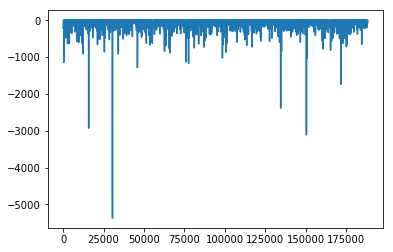

In [41]:
print (s_keys[7])
plt.plot(feature_matrix[:,7])
feat_i

In [42]:
change_i = np.where(raw_feature_matrix[:,feat_i]!=np.nan)[0]
print(len(change_i))
change_i

188453


array([     0,      1,      2, ..., 188450, 188451, 188452], dtype=int64)

In [43]:
change_feature = True
if change_feature:
    feature_matrix[change_i,feat_i] = np.log(1-np.copy(raw_feature_matrix[change_i,feat_i]))
    # for i in range(len(change_i)):
    for i in range(50):
        print(raw_feature_matrix[change_i[i],feat_i],feature_matrix[change_i[i],feat_i])

-214.64 5.37361035058
-214.64 5.37361035058
-214.64 5.37361035058
-214.64 5.37361035058
-214.64 5.37361035058
-214.64 5.37361035058
-214.64 5.37361035058
-214.64 5.37361035058
-214.64 5.37361035058
-214.64 5.37361035058
-214.64 5.37361035058
-214.64 5.37361035058
-214.64 5.37361035058
-214.64 5.37361035058
-214.64 5.37361035058
-214.64 5.37361035058
-214.64 5.37361035058
-214.64 5.37361035058
-214.64 5.37361035058
-214.64 5.37361035058
-214.64 5.37361035058
-214.64 5.37361035058
-214.64 5.37361035058
-214.64 5.37361035058
-123.17 4.82165159443
-123.17 4.82165159443
-123.17 4.82165159443
-123.17 4.82165159443
-123.17 4.82165159443
-123.17 4.82165159443
-123.17 4.82165159443
-123.17 4.82165159443
-123.17 4.82165159443
-123.17 4.82165159443
-123.17 4.82165159443
-123.17 4.82165159443
-123.17 4.82165159443
-123.17 4.82165159443
-123.17 4.82165159443
-123.17 4.82165159443
-123.17 4.82165159443
-123.17 4.82165159443
-123.17 4.82165159443
-123.17 4.82165159443
-123.17 4.82165159443
-123.17 4.

0.0 8.58818459783


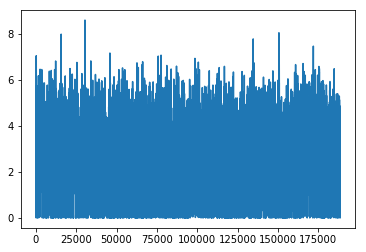

In [44]:
print(np.min(feature_matrix[:,feat_i]), np.max(feature_matrix[:,feat_i]))
plt.plot(feature_matrix[change_i,feat_i])

In [45]:
print(np.min(feature_matrix), np.max(feature_matrix[:,:19]))

0.0 336.0


In [46]:
np.shape(feature_matrix[:,:5])

(188453, 5)

## Mapminmax normalise scale per feature per patient

In [47]:
norm_feat_pat = False
if norm_feat_pat:
    for i in range(5000):
        i_pat = np.where(patient==i)[0]
        scaler = MinMaxScaler()
        scaler.fit(feature_matrix[i_pat,:5])
        feature_matrix[i_pat,:5] = scaler.transform(feature_matrix[i_pat,:5])
        
# Per single feature
#         for j in range(np.shape(feature_matrix)[1]):
#             scaler.fit(feature_matrix[i_pat,j])
#             feature_matrix[i_pat,j] = scaler.transform(feature_matrix[i_pat,j])

## Divide in 2 sets

In [48]:
A_idx = np.where(patient < 2500)[0]
features_A = feature_matrix[A_idx,:]
np.shape(features_A)

(94404, 9)

In [49]:
B_idx = np.where(patient >= 2500)[0]
features_B = feature_matrix[B_idx,:]
np.shape(features_B)

(94049, 9)

In [50]:
print(np.min(features_A), np.max(features_A))
print(np.min(features_B), np.max(features_B))
print("\n======  \nA feature ranges")
for i in range (np.shape(features_A)[1]):
    print(s_keys[i], np.min(features_A[:,i]), np.max(features_A[:,i]))

0.0 336.0
0.0 308.0

A feature ranges
HR 0.0 186.0
O2Sat 0.0 100.0
SBP 0.0 299.0
MAP 0.0 293.0
DBP 0.0 293.0
Age 17.0 100.0
Gender 0.0 1.0
HospAdmTime 0.0 8.58818459783
ICULOS 1.0 336.0


## Create an ESN

In [51]:
def sigmoid(x):
#     exponent = 4
    exponent = 1

    x_out= np.zeros((len(x),1), dtype=np.double)
    for k in range(len(x)):
        if m.fabs(x[k])>150:
            x_out[k]=np.sign(x[k])*1
        else:    
            x_out[k] = 2*(m.exp(exponent*x[k]) / (1 + m.exp(exponent*x[k])))-1
    return (x_out)
#     return np.transpose(x_out)

def rectify(x):
    return np.array(x>0).astype(np.double)*x

# func = sigmoid
func = rectify

In [52]:
a = np.linspace(-10, 10, 100, False)
print(np.shape(a))
print(len(a))

(100,)
100


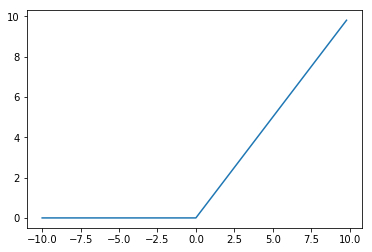

In [53]:
b = func(a)
plt.plot(a,b)

#### Create rand masks (input weight)
#### M⊂[-1,1]

In [54]:
N = 800
M = 2*np.random.rand(np.shape(feature_matrix)[1],N)-1
print(np.shape(M))
print(np.min(M), np.max(M))

(9, 800)
-0.999446366681 0.999613915444


In [55]:
dfeat = np.shape(features_A)[1]
dsamples = np.shape(features_A)[0]
mem = 0.2
scal = 0.5
ESN = np.ones((dsamples,N), dtype=np.double)
x = np.ones_like(ESN)
x = np.matmul(features_A,M,x)
print(np.shape(x))
print(np.shape(x[0,:]))
print(type(x[0,:]))
print(np.shape(x[0,:].reshape(1,-1)))
print(np.shape(ESN[0,:]))


(94404, 800)
(800,)
<class 'numpy.ndarray'>
(1, 800)
(800,)


-938.619126326 780.673151766


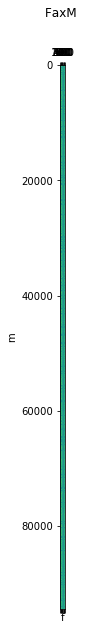

In [56]:
fig, ax = plt.subplots(figsize=(13,10))
ax.matshow(x)
ax.set_title("FaxM \n",loc='center')
ax.set_xlabel('f')
ax.set_ylabel('m')
print(np.min(x), np.max(x))

37 entries x 9


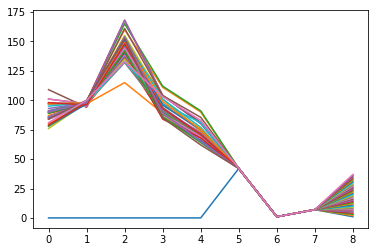

In [57]:
i_pat = 6

def plot_patient_features(n_pat, features):
    plot_j = np.where(patient == n_pat)[0]
    for j in range (len(plot_j)):
        plt.plot(features_A[plot_j[j],:])    
    print(len(plot_j), "entries x", np.shape(features)[1])
    return

def print_patient_features(n_pat, features):
    print("Patient", n_pat)
    print_j = np.where(patient == n_pat)[0]
    for j in range (len(print_j)):
        print(features_A[print_j[j],:])    
    return

plot_patient_features(i_pat, feature_matrix)

In [58]:
#print_patient_features(i_pat, feature_matrix)

In [59]:
# Get the ESN reservoir state
print(np.shape(x[0,:]))
print(np.shape(x[0,:].reshape(1,-1)))
print(np.shape(ESN[0,:]))


for i in range(5000):
    if i ==0:
        p = np.zeros((1,N),dtype=np.double)
    ESN[i,:] = sigmoid(np.copy(scal*x[i,:] + mem*p).reshape(N)).flatten()
    p = (np.copy(ESN[i,:]))
    p = np.roll(p,1)
    
print(np.shape(p))

(800,)
(1, 800)
(800,)
(800,)


In [60]:
# i += 1
# if i ==0:
#     p = np.zeros((1,N),dtype=np.double)
# ESN[i,:] = sigmoid(np.copy(scal*x[i,:] + mem*p).reshape(N)).flatten()
# p = (np.copy(ESN[i,:]))
# p = np.roll(p,1)

In [61]:
# print(i, ESN[i,:])

In [62]:
# print(i,p)

In [63]:
print(i)
# print(p)
# print(x[i,:])
print(np.max(x[i,:]))
sigmoid(np.array([150]))

4999
356.725682482


array([[ 1.]])

In [64]:
# plt.plot(feature_matrix[:,feat_i])

In [65]:
np.shape(ESN)

(94404, 800)

336.0

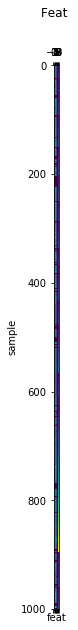

In [66]:
fig, ax = plt.subplots(figsize=(13,10))
ax.matshow((features_A[:1000,:]))
ax.set_title("Feat \n",loc='center')
ax.set_xlabel('feat')
ax.set_ylabel('sample')
np.min(features_A)
np.max(features_A)


-1.0 1.0


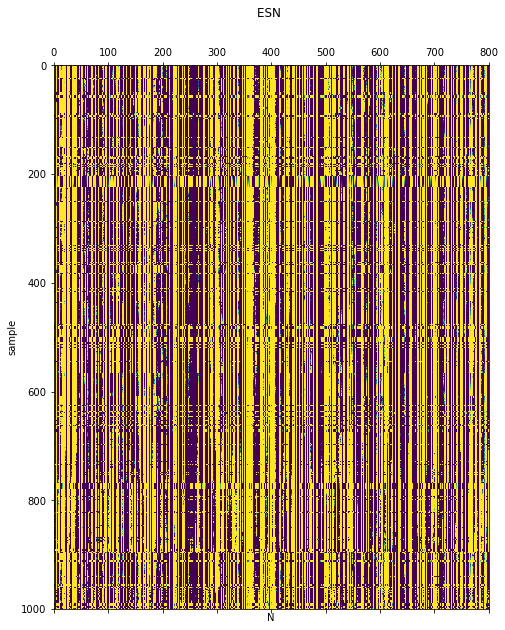

In [67]:
fig, ax = plt.subplots(figsize=(13,10))
ax.matshow((ESN[:1000,:]))
ax.set_title("ESN \n",loc='center')
ax.set_xlabel('N')
ax.set_ylabel('sample')
print(np.min(ESN), np.max(ESN))

In [68]:
ESNx = np.hstack((np.ones((dsamples,1),dtype=np.double),ESN ))

800.98894256979395

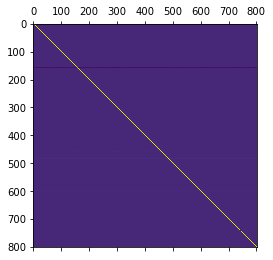

In [69]:
ESNinv = np.linalg.pinv(ESNx)
I = np.matmul(ESNinv,ESNx)
plt.matshow(I)
np.sum(I)

In [70]:
w = np.matmul(ESNinv,sepsis_label[A_idx])
len(w)

801

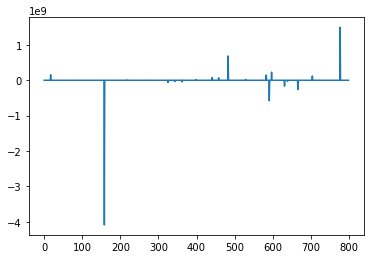

In [71]:
plt.plot(w[1:])

In [72]:
w[-1:]

array([[-0.03783502]])

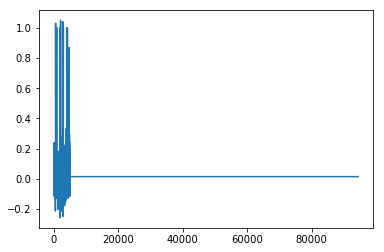

In [73]:
plt.plot(np.matmul(ESNx,w))

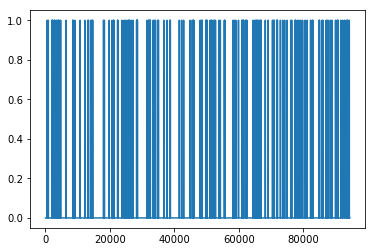

In [74]:
plt.plot(sepsis_label[A_idx])